In [ ]:
from torch.utils.data import Dataset, DataLoader
from diffBP.datasets import h36m_PoseSequence, train_val_split


from diffBP.datasets import pose_plotting as pose_plot

npz_file_path="/home/anakin513/Projects/PoseEstimation_With_Belief/Datasets/Human3.6m/mmpose_data/h36m_train.npz"
img_dir_base_path="/run/media/anakin513/0100-0900/HUMAN 3.6M/images"
mean_img=[0.485, 0.456, 0.406]
std_img=[0.229, 0.224, 0.225]
BBOX_SHAPE=[128,128]
train_batch_size=2


train_dict, val_dict = train_val_split.train_val_split_h36m(npz_file_path=npz_file_path, 
										                         split=0.8, 
                         										 train_frame_chunk_size=50, 
                         										 val_frame_chunk_size=100,
                         										 print_stats=True
																 
                                                             	)

train_dataset = h36m_PoseSequence.PoseSequenceDataset( data_dict=train_dict,
													       npz_file_path=npz_file_path,
													       img_dir=img_dir_base_path,
                    									   mean=mean_img,
														   std=std_img,
														   BBOX_SHAPE=BBOX_SHAPE
													)

train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size,
	                        shuffle=True)

Total actions: 600
Training actions: 480
Validation actions: 120
--------------------
Total keys in train_dict: 4757
Total keys in val_dict: 565

Example train_dict entry:
  Key: 'S1_TakingPhoto_1.58860488_part1'
  Value (first item): ('S1/images/S1_TakingPhoto_1.58860488/S1_TakingPhoto_1.58860488_000001.jpg', 35826)
  Frame count: 50

Example val_dict entry:
  Key: 'S7_Greeting.60457274_part1'
  Value (first item): ('S7/images/S7_Greeting.60457274/S7_Greeting.60457274_000001.jpg', 200787)
  Frame count: 100
Loading all annotations from /home/anakin513/Projects/PoseEstimation_With_Belief/Datasets/Human3.6m/mmpose_data/h36m_train.npz into memory...
Annotations loaded successfully.


In [5]:
# Load a single sample from the dataset
sample = train_dataset[0]  # Get the first sample



In [8]:
sample['labels']

tensor([[[ 57.0814,  88.7543],
         [ 70.9670,  87.5349],
         [ 57.4413, 121.2263],
         ...,
         [ 64.2963,  56.2322],
         [ 64.4216,  39.8026],
         [ 64.3402,  13.1171]],

        [[ 57.2576,  88.7539],
         [ 71.0976,  87.5862],
         [ 57.4860, 121.2270],
         ...,
         [ 64.5341,  56.2673],
         [ 64.7965,  39.7868],
         [ 64.7862,  13.1727]],

        [[ 56.8017,  88.7640],
         [ 70.6136,  87.6456],
         [ 56.8955, 121.2290],
         ...,
         [ 64.1219,  56.3139],
         [ 64.5694,  39.8654],
         [ 64.6264,  13.2685]],

        ...,

        [[ 53.7744,  86.0327],
         [ 69.0606,  87.1495],
         [ 45.5226, 117.0103],
         ...,
         [ 63.7992,  56.2211],
         [ 62.7427,  41.2688],
         [ 64.1103,  12.4024]],

        [[ 53.8988,  86.0376],
         [ 68.9520,  87.0894],
         [ 45.6409, 116.9975],
         ...,
         [ 63.6597,  56.1072],
         [ 62.4732,  40.9674],
         

Total actions: 600
Training actions: 480
Validation actions: 120
--------------------
Total keys in train_dict: 4751
Total keys in val_dict: 572

Example train_dict entry:
  Key: 'S7_Posing.54138969_part1'
  Value (first item): ('S7/images/S7_Posing.54138969/S7_Posing.54138969_000001.jpg', 212680)
  Frame count: 50

Example val_dict entry:
  Key: 'S7_Smoking.60457274_part1'
  Value (first item): ('S7/images/S7_Smoking.60457274/S7_Smoking.60457274_000001.jpg', 238278)
  Frame count: 100
Loading all annotations from /home/anakin513/Projects/PoseEstimation_With_Belief/Datasets/Human3.6m/mmpose_data/h36m_train.npz into memory...
Annotations loaded successfully.
Visualization saved as data_visualization.png


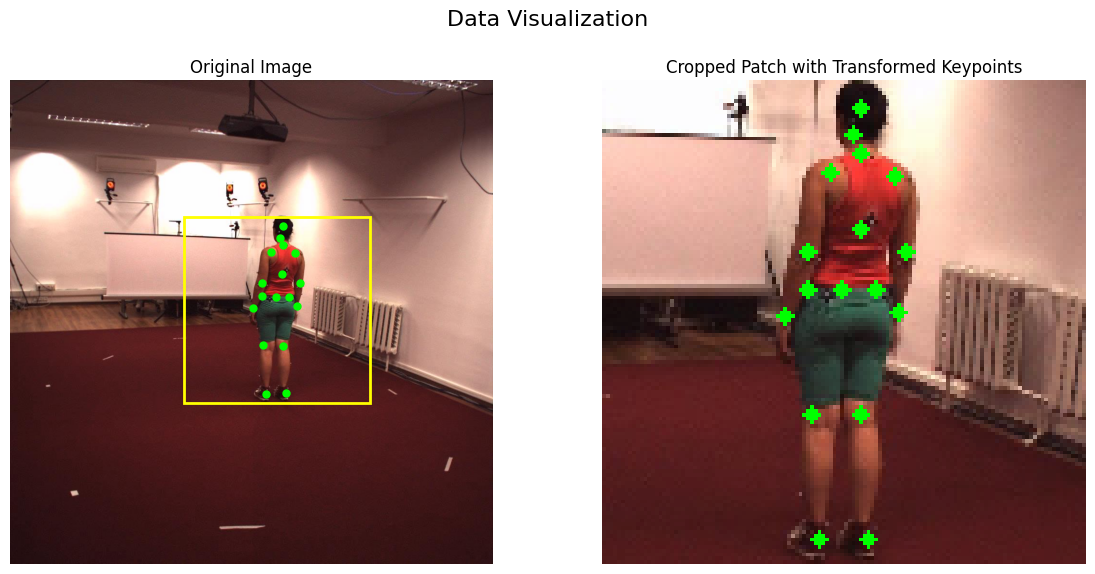

In [3]:
import numpy as np
import torch
from diffBP.datasets import h36m_PoseSequence, train_val_split
import matplotlib.pyplot as plt
import cv2
import os

npz_file_path = "/home/anakin513/Projects/PoseEstimation_With_Belief/Datasets/Human3.6m/mmpose_data/h36m_train.npz"
img_dir_base_path = "/run/media/anakin513/0100-0900/HUMAN 3.6M/images"
mean_img = [0.485, 0.456, 0.406]
std_img = [0.229, 0.224, 0.225]
BBOX_SHAPE = [128, 128]
train_batch_size = 2

# Split and create dataset/dataloader
train_dict, val_dict = train_val_split.train_val_split_h36m(
    npz_file_path=npz_file_path,
    split=0.8,
    train_frame_chunk_size=50,
    val_frame_chunk_size=100,
    print_stats=True
)

train_dataset = h36m_PoseSequence.PoseSequenceDataset(
    data_dict=train_dict,
    npz_file_path=npz_file_path,
    img_dir=img_dir_base_path,
    mean=mean_img,
    std=std_img,
    BBOX_SHAPE=BBOX_SHAPE
)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=train_batch_size
)

# --- Visualize a sample ---
for batch in train_dataloader:
    # Take the first sequence in the batch, and the first frame in the sequence
    window = batch['window'][0]  # (T, C, H, W)
    labels = batch['labels'][0]  # (T, Num_KP, 2)
    # For visualization, pick the first frame
    img_patch = window[0].numpy().transpose(1, 2, 0)  # (H, W, C)
    # Denormalize
    img_patch_rgb = (img_patch * std_img + mean_img) * 255.0
    img_patch_rgb = np.clip(img_patch_rgb, 0, 255).astype(np.uint8)
    transformed_keypoints = labels[0].numpy()  # (Num_KP, 2)

    # To get the original image and keypoints, you need to access the dataset internals
    # We'll use the dataset's __getitem__ to get the info for this sample
    # Find the corresponding index in the dataset
    idx = batch['window'].shape[0]  # batch size
    # We'll just use the first item in the dataset for demonstration
    sample_idx = 0
    sequence_key = train_dataset.sequence_keys[sample_idx]
    sequence_info = train_dataset.data_dict[sequence_key]
    img_path, original_index = sequence_info[0]
    filename_only = os.path.basename(img_path)
    full_image_path = os.path.join(img_dir_base_path, filename_only)
    full_image_bgr = cv2.imread(full_image_path)
    full_image_rgb = cv2.cvtColor(full_image_bgr, cv2.COLOR_BGR2RGB)
    original_keypoints = train_dataset.all_keypoints_2d[original_index]
    center = train_dataset.all_centers[original_index]
    scale = train_dataset.all_scales[original_index]
    bbox_size = scale * 200

    # Call the visualize function
    train_dataset.visualize_data(
        full_image_rgb,
        img_patch_rgb,
        transformed_keypoints,
        original_keypoints,
        center,
        bbox_size
    )
    print("Visualization saved as data_visualization.png")
    break  # Only visualize one batch